# EDA with Walmart Sales Data

## Business Objectives

Walmart, the retail giant that operates a chain of hypermarkets, wants to understand their weekly sales data, especially the impact from holidays and big events; specifically, Super Bowl, Labor Day, Thanksgiving, and Christmas. In addition, Walmart wants to consider the effect from different macroeconomic and external factors on the weekly sales. 

## Data Overview

- Original sales data were collected from 45 stores across the United States; however, for this session, you will first inspect data from three stores and later focus on just store 1. 

- Each store is of certain type and size, and there are multiple departments in a store. 

- The dataset has a temporal component, we mostly ignore this in this session and will discuss time series related techniques later in the cohort.

### Import the usual libraries

In [139]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load original data

- Check the shape and missing values in columns of dataframe
- Let's visualize one full year of weekly sales. 
First, sort the data by date.
Then, plot the first 52 weeks of the weekly sales over time.

(30990, 16)

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       19928
MarkDown2       21730
MarkDown3       20211
MarkDown4       20000
MarkDown5       19928
CPI                 0
Unemployment        0
Type                0
Size                0
dtype: int64

(143, 16)

<AxesSubplot: xlabel='Date'>

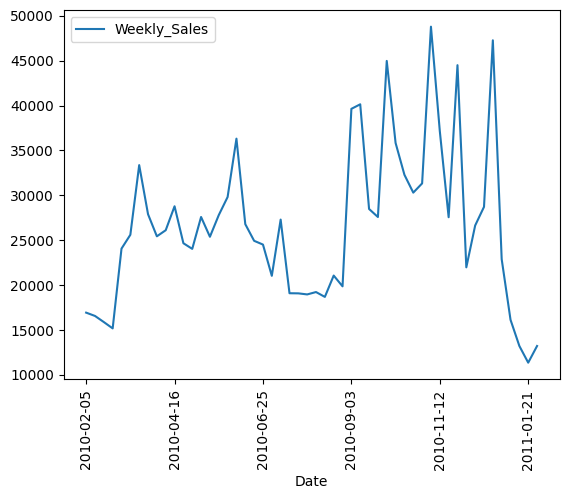

In [121]:

filepath = '../dat/train_comb.csv'
df = pd.read_csv(filepath)
df.shape

# Checking the missing values in columns
df.isna().sum()
#df.sample(3)

# Looking at the random department (Here Dept is 9) within store 1
df_store1 = df[df['Store'] == 1]
df_store1_dept9 = df_store1[df_store1['Dept'] == 9]
df_store1_dept9.shape

# First, sort values by date
# Then plot the weekly sales for the first 52 weeks, by setting the indez to Date
df_store1_dept9 = df_store1_dept9.sort_values(by='Date')
df_store1_dept9[['Date', 'Weekly_Sales']].iloc[:52]\
    .set_index('Date').plot(rot=90)

### Load the Store 1 data

- Work on extracting week, month, and year information from the `Date` column to be able to better manipulate the weekly data. Before extracting the data, use `.dtypes` to check the datatype of the `Date` column. 


In [123]:
df = pd.read_csv('../dat/train-store1.csv')
df.Date = pd.to_datetime(df['Date'])
df[['Date']].dtypes

df['week'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

Date    datetime64[ns]
dtype: object

- Split the data into training dataset (80%) and test dataset (20%). Use function `train_test_split` from `scikit-learn` ( a popular library for machine learning in Python ),  and set `random_state` to be 42 for reproducibility ( this is not the best way to do train-test-split due to the temporal nature of the data, however, we will ignore it for now).

- Summary statistics provide you with a general understanding of the data. Use method `.describe()`. By default it reports statistics mean, max, min, quantiles for numerical features and counts, unique, mode for categorical features.

In [126]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
print('Original set --> ', df.shape,
    '\nTraining set --> ', df_train.shape,
    '\nTesting set --> ', df_test.shape)

pd.options.display.float_format = "{:,.2f}".format
df_train.describe()

Original set -->  (10244, 19) 
Training set -->  (8195, 19) 
Testing set -->  (2049, 19)


,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,"8,195.00","8,195.00","8,195.00","8,195.00","8,195.00","2,931.00","2,424.00","2,878.00","2,931.00","2,931.00","8,195.00","8,195.00","8,195.00","8,195.00","8,195.00","8,195.00"
mean,1.00,44.65,"21,865.28",68.19,3.22,"8,045.43","2,961.55","1,236.83","3,683.59","5,023.69",216.00,7.61,"151,315.00",4.00,6.47,"2,010.96"
std,0.00,29.95,"27,970.00",14.16,0.43,"6,484.49","8,032.30","7,830.99","5,849.69","3,303.07",4.33,0.38,0.00,0.00,3.25,0.80
min,1.00,1.00,-863.00,35.40,2.51,410.31,0.50,0.25,8.00,554.92,210.34,6.57,"151,315.00",4.00,1.00,"2,010.00"
25%,1.00,20.00,"3,502.09",57.79,2.76,"4,039.39",40.48,6.00,577.14,"3,127.88",211.57,7.35,"151,315.00",4.00,4.00,"2,010.00"
50%,1.00,38.00,"10,357.32",69.64,3.29,"6,154.14",137.86,30.23,"1,822.55","4,325.19",215.46,7.79,"151,315.00",4.00,6.00,"2,011.00"
75%,1.00,72.00,"31,647.36",80.48,3.59,"10,121.97","1,569.00",101.64,"3,639.42","6,222.25",220.64,7.84,"151,315.00",4.00,9.00,"2,012.00"
max,1.00,99.00,"203,670.47",91.65,3.91,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",223.44,8.11,"151,315.00",4.00,12.00,"2,012.00"


- Are there any missing values? Use `.isna()` and `.sum()` to show the number of missing values from each column.

In [127]:
df_train.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

- Assign the target column to variable target

- Visualize the distribution of target variable using `distplot()` from library `seaborn` ( Why seaborn? Check out a comparison between Matplotlib and Seaborn [here](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/) ). 



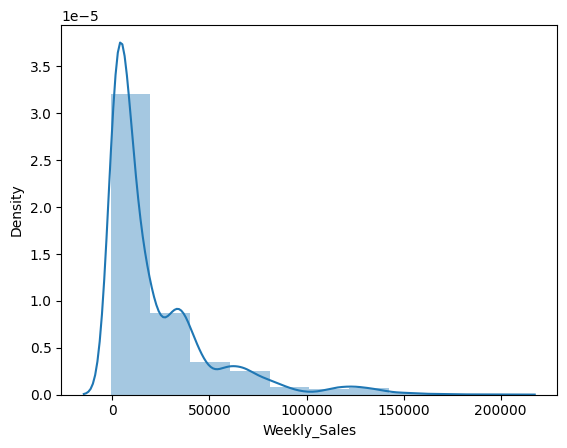

In [135]:
target = 'Weekly_Sales'
sns.distplot(df_train[target], bins=10);

- Notice there exist some non-positive values (Approx 0.16 %)

- After communicating your findings, the stakeholders can confirm that you can remove these data entries for now. Now remove the negative and zero sales from the training dataset.

In [136]:
df_train[df_train[target] <= 0].shape[0]
print(f'{(df_train[target] <= 0).mean():.2%}')

13

0.16%


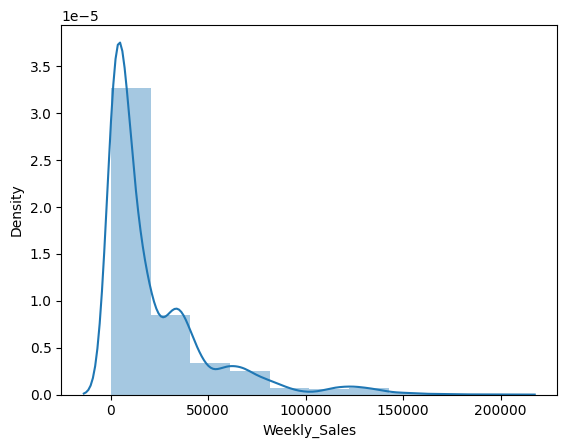

In [137]:
mask = df_train[target] > 0
df_train_mask = df_train[mask]
df_train_mask.shape
sns.distplot(df_train_mask[target], bins=10);

## Feature Selection

- `Temperature`, `CPI`, `Unemployment`, `Fuel_Price` are continuous variables. Those tie to the second business objective of looking into the effects from different external factors on weekly sales. 

- Put these four features into a list and store it in `external_factors`. 

- Earlier we noticed that `MarkDownx` columns contain some missing values, so we will focus on them in a later task. 

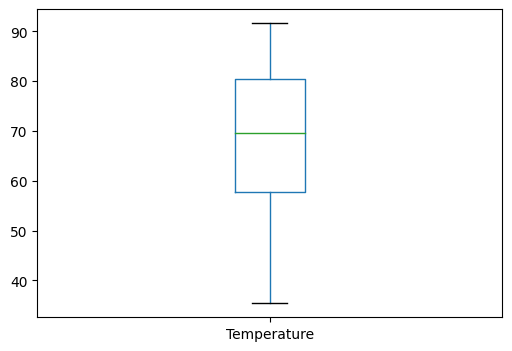

In [138]:
[(col, df_train_mask[col].nunique()) for col in df_train_mask.columns]
external_factors = ['Temperature', 'CPI', 'Unemployment', 'Fuel_Price']
# sns.boxplot(x=df_train_mask['Temperature'])
df_train_mask.boxplot(column='Temperature', figsize=(6,4), grid=False);

Plot all four numerical features using both distribution plot and box plot. Note any observations.

                                   Numeric Features Distribution                                    


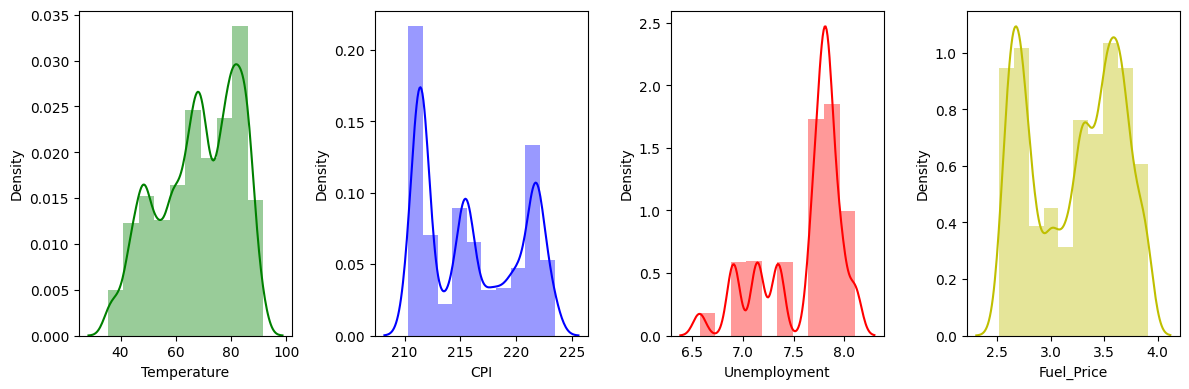

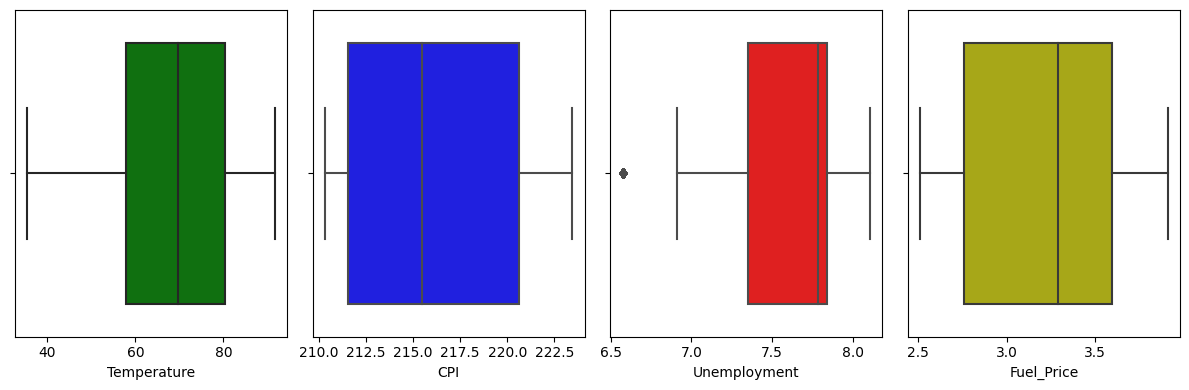

In [56]:
print('Numeric Features Distribution'.center(100))

figsize = (12,4)

n = len(external_factors)
colors = ['g','b', 'r', 'y', 'k']

plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1, n, i+1)
    sns.distplot(df_train_mask[external_factors[i]],
                bins=10,
                color=colors[i])
plt.tight_layout();

plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.boxplot(x=df_train_mask[external_factors[i]],
                color = colors[i])
plt.tight_layout();

It makes more sense to treat `year`, `month`, `week` as categorical variables, and even more accurately ordinal variables. 

The boolean feature `IsHoliday` can be considered categorical, and so can `Dept`. 

Let's put these column names into a list `categoricalFeatures`.

- For the categorical features, we are interested in the frequency of each value. 

In [140]:
categorical_features = ['year','month','week','IsHoliday', 'Dept']
df_train_mask['IsHoliday'].value_counts()

False    7586
True      596
Name: IsHoliday, dtype: int64

- Visualize the distribution of categorical feature ; use `sns.countplot()`.

                                   Numeric Features Distribution                                    


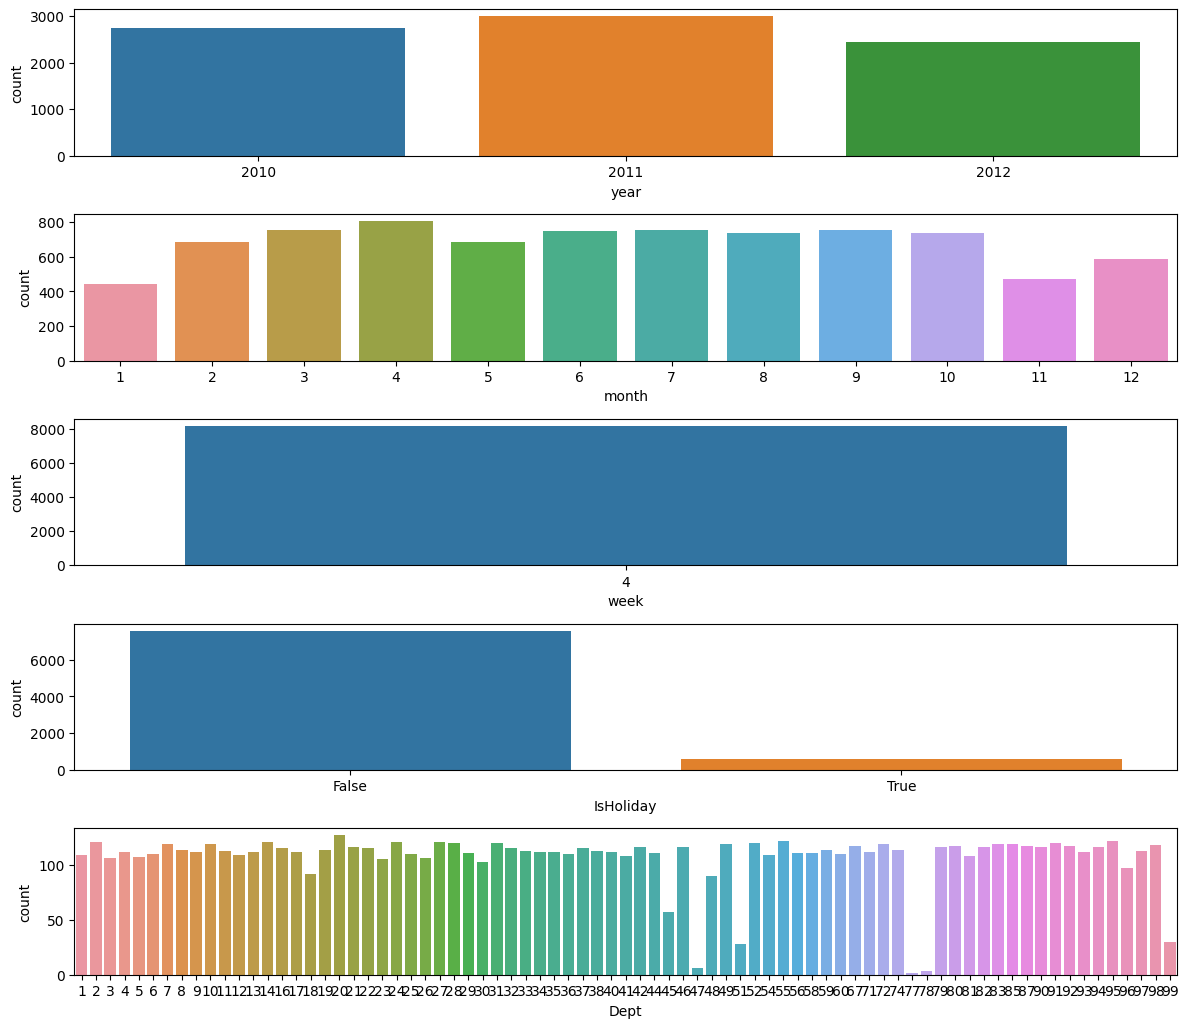

In [141]:
print('Numeric Features Distribution'.center(100))

plt.figure(figsize=(12,12))

for i in range(len(categorical_features)):
    plt.subplot(6,1,i+1)
    sns.countplot(x=df_train_mask[categorical_features[i]])
plt.tight_layout();

? Few questions to ponder 
- There is less data in 2012 than the previous two years. Did the sale drop from previous years? Does it affect what we see in the plots for month and week? Does the plot below clarify it to some degree?

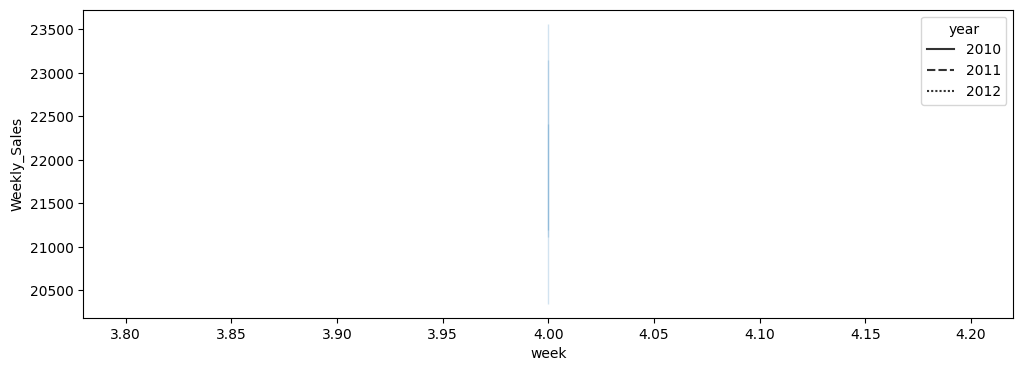

In [142]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_train_mask, x="week", y="Weekly_Sales", style="year");

There is a feature `IsHoliday` that we can use to calculate the average weekly sales for holiday weeks and non-holiday weeks. 

In [73]:
df_train_mask.groupby(by='IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False   21,756.05
True    23,737.05
Name: Weekly_Sales, dtype: float64

But we would like to understand it at more granular level. Remember [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson's_paradox)? To save some time,  date mapping are identified for the training data

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
- Thanksgiving: 26-Nov-10, 25-Nov-11
- Christmas: 31-Dec-10, 30-Dec-11

In [77]:
superbowl_mask = df_train_mask['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10'])
laborday_mask = df_train_mask['Date'].isin(['2010-09-10', '2011-09-09','2012-09-07'])
thanksgiving_mask = df_train_mask['Date'].isin(['2010-11-26', '2011-11-25'])
christmas_mask = df_train_mask['Date'].isin(['2010-12-31', '2011-12-30'])

df_train_mask['superbowl'] = superbowl_mask
df_train_mask['laborday'] = laborday_mask
df_train_mask['thanksgiving'] =thanksgiving_mask
df_train_mask['christmas'] = christmas_mask

1. how many weekly sales happened on holidays (does it make sense? what did we not account for?)
2. what is the average weekly sales stratified by whether it is holidays week or not?

In [78]:
holidays = ['superbowl', 'laborday', 'thanksgiving', 'christmas']
for holiday in holidays:
    summary_stats = df_train_mask.groupby([holiday])\
        .agg(count = (holiday, 'size'),
        avg_weekly_sales = ('Weekly_Sales', 'mean'))
    print(summary_stats)
    print()

           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56



From below scatter plot on the Dept column, Dept 72 has a very unusual high weekly sales during the holiday week, but we will need more data to understand if this is data issue, outlier, or special event. 

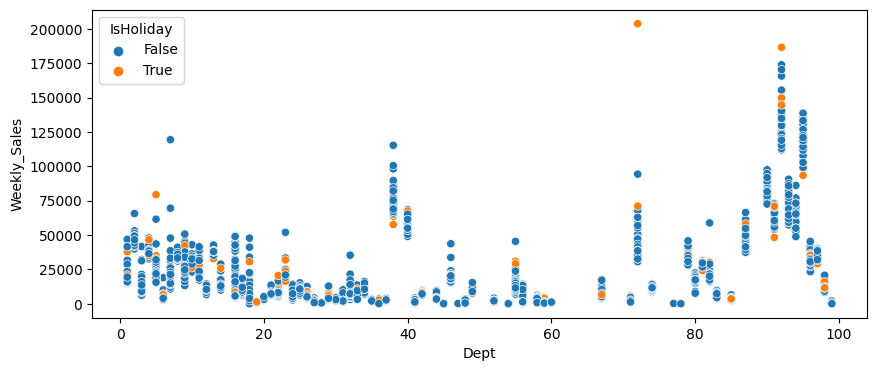

In [83]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_train_mask[df_train_mask.year==2011], x='Dept', y=target, hue='IsHoliday');

Visualize Relationship between Macroeconomic & External Factors and Sales

                                     External Features lineplot                                     


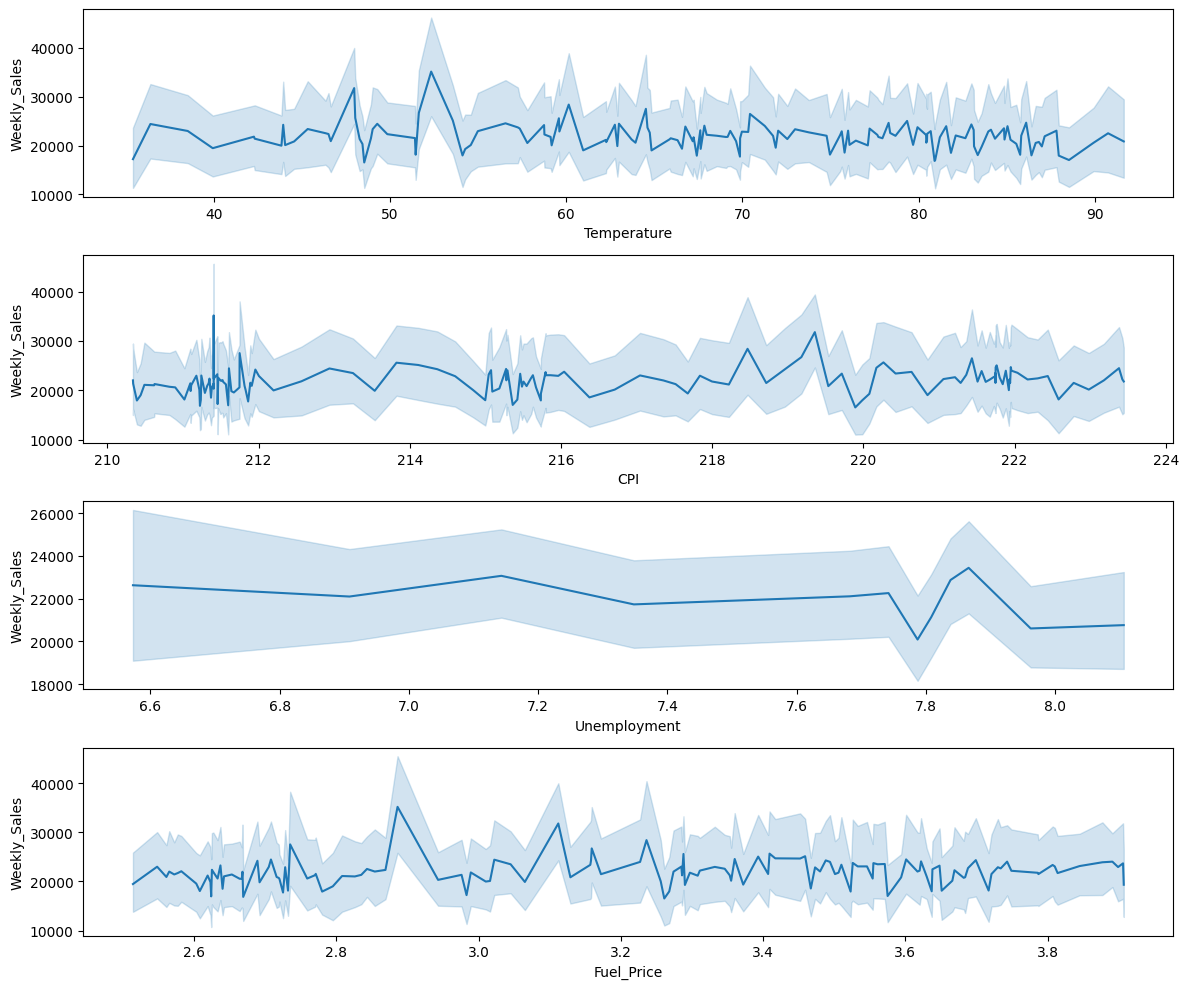

In [87]:
print('External Features lineplot'.center(100))

plt.figure(figsize=(12,10))
for i in range(len(external_factors)):
    plt.subplot(4,1,i+1)
    sns.lineplot(data=df_train_mask, x=external_factors[i], y='Weekly_Sales')
plt.tight_layout();


Lastly, we calculate the spearman correlations between the target and the external factors to verify that there is no strong linear correlation between the target variable and these features.

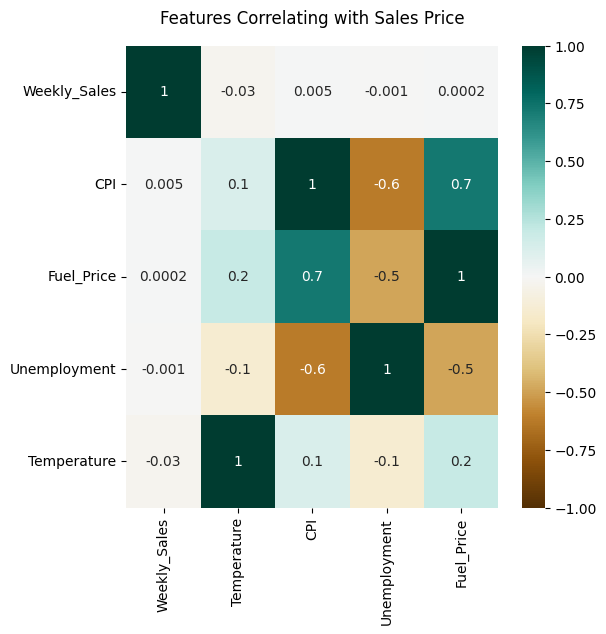

In [91]:
plt.figure(figsize=(6,6))

df_train_reduced = df_train_mask[[target] + external_factors]
corr = df_train_reduced.corr(method='spearman')
heatmap = sns.heatmap(corr.sort_values(by=target, ascending=False),
                    vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);


The majority of the markdown fields are missing. This is where, again, we need to communicate with the stakeholders to understand what the data measure, how the data was collected and then determine our strategy from there. Since we want to understand the impacts of `MarkDownx` on weekly sales, we will keep the features and impute the missing values.  We have learned that there are tradeoffs with how we treat missing values and that our choice of imputation can be significantly impacted by extreme values and the amount of the missing data.  We choose to impute with the median here to mitigate these negative impacts. Use `.fillna()` to impute the missing values.

In [144]:
df_train_mask.columns[df_train_mask.isna().sum() != 0]
mycols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in mycols:
    perc_missing = df_train_mask[col].isna().mean()
    print(f'{col}: {perc_missing: .0%} is missing')

for col in ['MarkDown'+str(i+1) for i in range(len(mycols))]:
    df_train_mask[col] = df_train_mask[col].fillna(df_train_mask[col].median()) 

(df_train_mask.isna().sum() != 0).sum() # sanity check: 0

Index([], dtype='object')

MarkDown1:  0% is missing
MarkDown2:  0% is missing
MarkDown3:  0% is missing
MarkDown4:  0% is missing
MarkDown5:  0% is missing


0

Visualize the distributions for those markdown fields after imputations, are they normal?

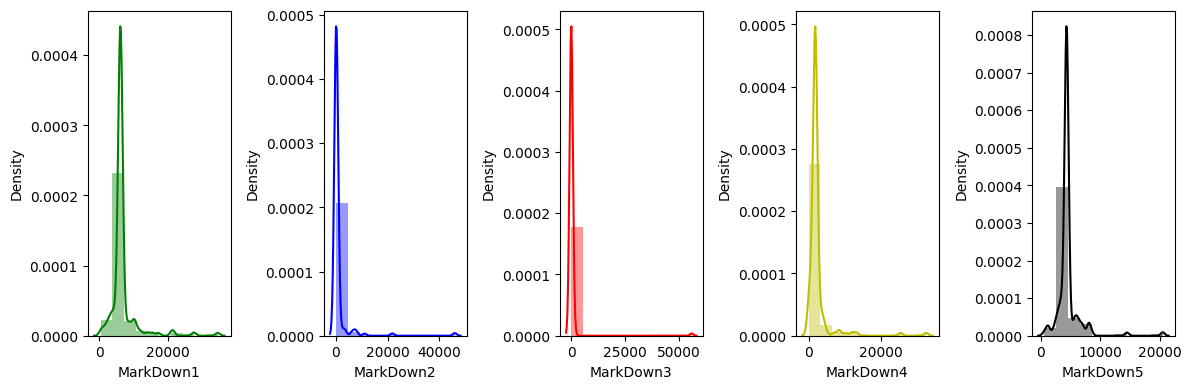

In [145]:
plt.figure(figsize=(12,4))
for i in range(len(mycols)):
    plt.subplot(1,len(mycols),i+1)
    sns.distplot(df_train_mask[mycols[i]],
                hist_kws=dict(linewidth=2),
                bins=10, 
                color = colors[i])
plt.tight_layout();


## Feature Engineering : sklearn

- For this task, let's keep `Temperature` from the external features, since it is the most linearly correlated with the target variable, though very weak and negative. 

- In addition, we include one markdown field. Since neither seems to follow normal distributions, it is safer to use `MinMaxScaler` from `sklearn.preprocessing` to transform features by scaling each feature to a given range (See discussion on [Normalization vs Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/))

In [146]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numerical_features = ['Temperature', 'MarkDown1']
df_train_num = df_train_mask[numerical_features]
df_train_num.describe()

scaler = MinMaxScaler()
scaler.fit(df_train_num)
train_norm = scaler.transform(df_train_num)

pd.DataFrame(train_norm, columns=df_train_num.columns).describe()


,Temperature,MarkDown1
count,"8,182.00","8,182.00"
mean,68.19,"6,828.42"
std,14.16,"3,981.30"
min,35.40,410.31
25%,57.79,"6,154.14"
50%,69.64,"6,154.14"
75%,80.48,"6,154.14"
max,91.65,"34,577.06"


MinMaxScaler()

,Temperature,MarkDown1
count,"8,182.00","8,182.00"
mean,0.58,0.19
std,0.25,0.12
min,0.00,0.00
25%,0.40,0.17
50%,0.61,0.17
75%,0.80,0.17
max,1.00,1.00


In [147]:
categoricalFeatures = ['Dept', 'IsHoliday']
df_train_cat = df_train_mask[categoricalFeatures]
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(df_train_cat)
train_ohe = ohe.transform(df_train_cat)

print(train_ohe.shape, df_train_cat.shape)

OneHotEncoder(handle_unknown='ignore', sparse=False)

(8182, 79) (8182, 2)


In [148]:
X_train = np.hstack([train_norm, train_ohe])
X_train.shape

(8182, 81)

## Pipeline Build Using sklearn.pipeline

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('../dat/train-store1.csv')
df.shape
target = 'Weekly_Sales'
X, y = df.drop(columns=target), df[target]

numeric_features = ['CPI', 'MarkDown1']
numeric_transformers = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("transformer", MinMaxScaler())    
])

categorical_features = ['Dept', 'IsHoliday']
categorical_transformers = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformers, numeric_features),
        ("cat", categorical_transformers, categorical_features)
    ]
)

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
print('model score: %.3f' % model.score(X_test, y_test))

(10244, 16)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transformer',
                                                                   MinMaxScaler())]),
                                                  ['CPI', 'MarkDown1']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dept', 'IsHoliday'])])),
                ('model', LinearRegression())])

model score: 0.949
